In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [3]:
from sklearn.preprocessing import PolynomialFeatures

In [4]:
boston=load_boston()

In [5]:
boston.data.shape

(506, 13)

In [6]:
boston.target.shape

(506,)

In [7]:
bos=pd.DataFrame(boston.data,columns=boston.feature_names)
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [8]:
bos['PRICE']=boston.target
bos.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7


In [9]:
X=bos.drop('PRICE',axis=1)
y=bos['PRICE']


In [10]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=100)


In [11]:
X_train.shape


(404, 13)

In [12]:
y_train.shape

(404,)

In [13]:
X_test.shape

(102, 13)

In [14]:
y_test.shape

(102,)

In [15]:
ln=LinearRegression()
ln.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [16]:
y_train_predict=ln.predict(X_train)

In [17]:
rmse=np.sqrt(mean_squared_error(y_train,y_train_predict))
rmse

4.652889093008086

In [18]:
r2=round(ln.score(X_train,y_train),2)
r2

0.73

In [19]:
y_test_pred=ln.predict(X_test)
rmse_test=np.sqrt(mean_squared_error(y_test,y_test_pred))
rmse_test

4.859731895955129

In [20]:
r2_test=round(ln.score(X_test,y_test),2)
r2_test

0.76

In [21]:
ln.score(X_test,y_test)

0.7555033086871304

In [22]:
ln.score(X_train,y_train)

0.7337332767917557

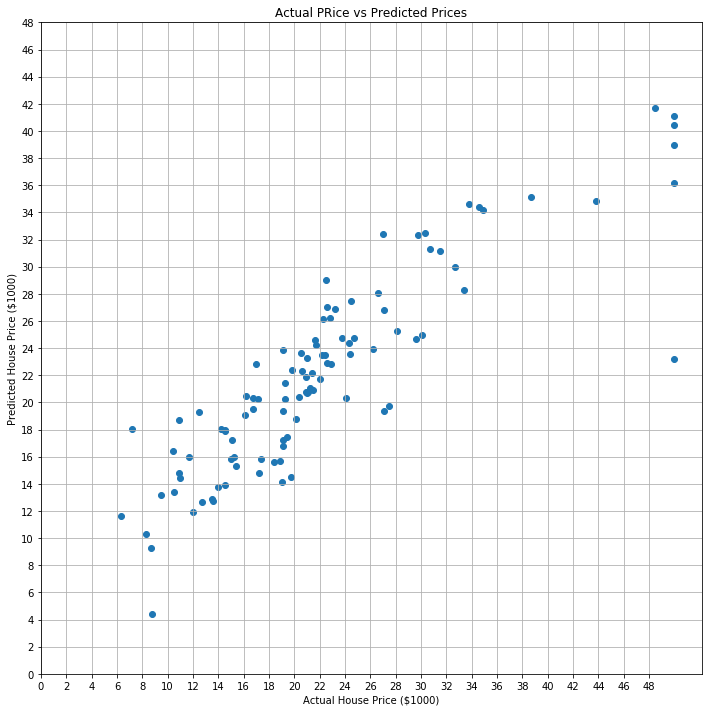

In [23]:
plt.figure(figsize=(10, 10))
plt.grid()
plt.scatter(y_test,y_test_pred);
plt.xlabel('Actual House Price ($1000)')
plt.ylabel('Predicted House Price ($1000)')
plt.xticks(range(0,int(max(y_test)),2))
plt.yticks(range(0,int(max(y_test)),2))
plt.title('Actual PRice vs Predicted Prices')
plt.tight_layout()
plt.show()

# polynomial regression

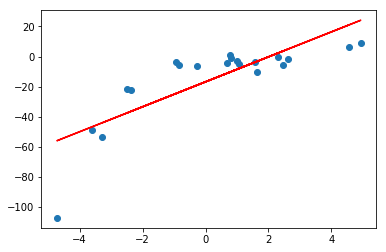

In [24]:
np.random.seed(0)
x = 2 - 3 * np.random.normal(0, 1, 20)
y = x - 2 * (x ** 2) + 0.5 * (x ** 3) + np.random.normal(-3, 3, 20)

# transforming the data to include another axis
x = x[:, np.newaxis]
y = y[:, np.newaxis]

model = LinearRegression()
model.fit(x, y)
y_pred = model.predict(x)

plt.scatter(x,y)
plt.plot(x,y_pred,c='r')
plt.show()

In [25]:
pf=PolynomialFeatures(degree=2)
x_poly=pf.fit_transform(x)

In [26]:
ln=LinearRegression()
ln.fit(x_poly,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [27]:
y_poly_pred=ln.predict(x_poly)
import operator

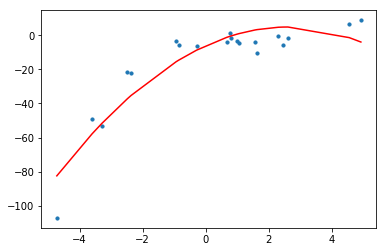

In [28]:
plt.scatter(x,y,s=10)
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
x, y_poly_pred = zip(*sorted_zip)
plt.plot(x,y_poly_pred,c='r')
plt.show()


In [29]:
ln.score(x_poly,y)

0.8537647164420812

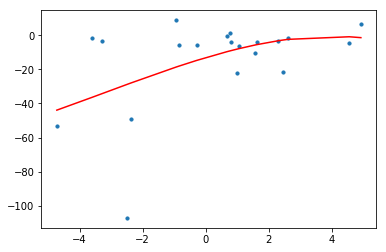

In [30]:
pf=PolynomialFeatures(degree=3)
x_poly=pf.fit_transform(x)
ln=LinearRegression()
ln.fit(x_poly,y)
y_poly_pred=ln.predict(x_poly)
plt.scatter(x,y,s=10)
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
x, y_poly_pred = zip(*sorted_zip)
plt.plot(x,y_poly_pred,c='r')
plt.show()

In [31]:
ln.score(x_poly,y)

0.23225482806073827

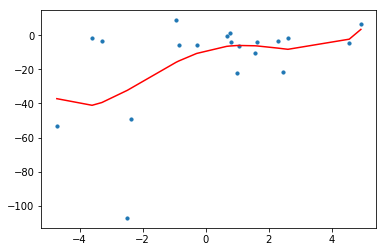

In [32]:
pf=PolynomialFeatures(degree=4)
x_poly=pf.fit_transform(x)
ln=LinearRegression()
ln.fit(x_poly,y)
y_poly_pred=ln.predict(x_poly)
plt.scatter(x,y,s=10)
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
x, y_poly_pred = zip(*sorted_zip)
plt.plot(x,y_poly_pred,c='r')
plt.show()

In [33]:
ln.score(x_poly,y)

0.25292987536181566

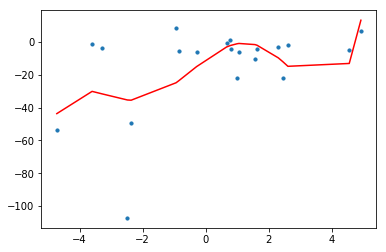

In [37]:
pf=PolynomialFeatures(degree=5)
x_poly=pf.fit_transform(x)
ln=LinearRegression()
ln.fit(x_poly,y)
y_poly_pred=ln.predict(x_poly)
plt.scatter(x,y,s=10)
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
x, y_poly_pred = zip(*sorted_zip)
plt.plot(x,y_poly_pred,c='r')
plt.show()

In [38]:
ln.score(x_poly,y)

0.3129204624156172

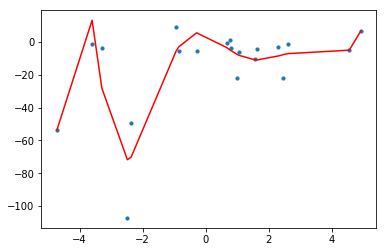

In [39]:
pf=PolynomialFeatures(degree=8)
x_poly=pf.fit_transform(x)
ln=LinearRegression()
ln.fit(x_poly,y)
y_poly_pred=ln.predict(x_poly)
plt.scatter(x,y,s=10)
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
x, y_poly_pred = zip(*sorted_zip)
plt.plot(x,y_poly_pred,c='r')
plt.show()

In [40]:
ln.score(x_poly,y)

0.7553397194260899

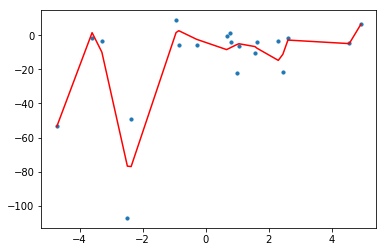

In [41]:
pf=PolynomialFeatures(degree=10)
x_poly=pf.fit_transform(x)
ln=LinearRegression()
ln.fit(x_poly,y)
y_poly_pred=ln.predict(x_poly)
plt.scatter(x,y,s=10)
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
x, y_poly_pred = zip(*sorted_zip)
plt.plot(x,y_poly_pred,c='r')
plt.show()

In [42]:
ln.score(x_poly,y)

0.815412554786155

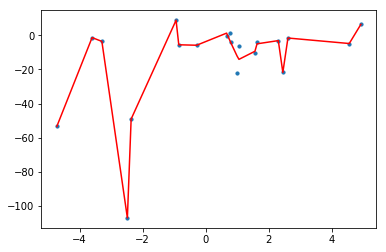

In [43]:
pf=PolynomialFeatures(degree=15)
x_poly=pf.fit_transform(x)
ln=LinearRegression()
ln.fit(x_poly,y)
y_poly_pred=ln.predict(x_poly)
plt.scatter(x,y,s=10)
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
x, y_poly_pred = zip(*sorted_zip)
plt.plot(x,y_poly_pred,c='r')
plt.show()

In [44]:
ln.score(x_poly,y)

0.9868390680746973

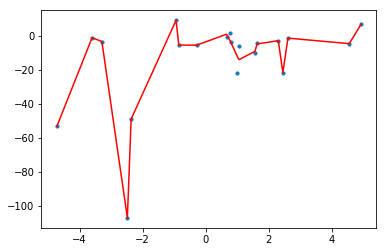

In [45]:
pf=PolynomialFeatures(degree=20)
x_poly=pf.fit_transform(x)
ln=LinearRegression()
ln.fit(x_poly,y)
y_poly_pred=ln.predict(x_poly)
plt.scatter(x,y,s=10)
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
x, y_poly_pred = zip(*sorted_zip)
plt.plot(x,y_poly_pred,c='r')
plt.show()

In [46]:
ln.score(x_poly,y)

0.9868001061444646

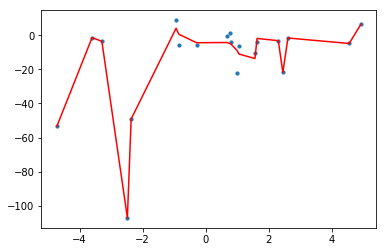

In [47]:
pf=PolynomialFeatures(degree=22)
x_poly=pf.fit_transform(x)
ln=LinearRegression()
ln.fit(x_poly,y)
y_poly_pred=ln.predict(x_poly)
plt.scatter(x,y,s=10)
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
x, y_poly_pred = zip(*sorted_zip)
plt.plot(x,y_poly_pred,c='r')
plt.show()

In [48]:
ln.score(x_poly,y)

0.9769658931216703

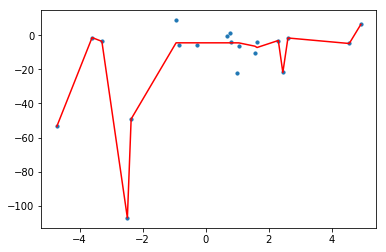

In [49]:
pf=PolynomialFeatures(degree=25)
x_poly=pf.fit_transform(x)
ln=LinearRegression()
ln.fit(x_poly,y)
y_poly_pred=ln.predict(x_poly)
plt.scatter(x,y,s=10)
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
x, y_poly_pred = zip(*sorted_zip)
plt.plot(x,y_poly_pred,c='r')
plt.show()

In [50]:
ln.score(x_poly,y)

0.9597752589835616

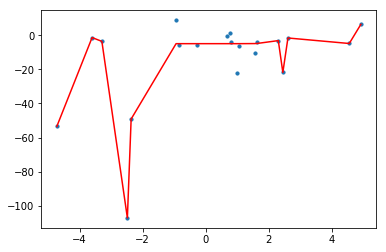

In [51]:
pf=PolynomialFeatures(degree=30)
x_poly=pf.fit_transform(x)
ln=LinearRegression()
ln.fit(x_poly,y)
y_poly_pred=ln.predict(x_poly)
plt.scatter(x,y,s=10)
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
x, y_poly_pred = zip(*sorted_zip)
plt.plot(x,y_poly_pred,c='r')
plt.show()

In [52]:
ln.score(x_poly,y)

0.9590231031131524